<img src="./logo_UNSAM.jpg" align="right" width="150" />

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº3
#### Tobías Domenech

# Introducción

Un conversor de señal analógica a digital (**ADC**) es un dispositivo electrónico que permitirá el pasaje de una señal de tipo analógica, a otra de tipo digital. Este proceso implicará, por un lado, la **cuantización** de la señal analógica (para lo cual el ADC trabjará con un cantidad determinada de bits y dentro de un rango establecido de voltaje) y, a su vez, el efecto del ruido sobre la señal (ruido tanto de carácter analógico, traido por la señal, como de cuantización/digital producto de la aproximación realizada para tomar los valores de la señal dado que no se toman todos).

En el siguiente trabajo se simulará el proceso de cuantización de un ADC de B bits en un rango $\pm V_f Volts$. Se simulará el comportamiento del dispositivo al digitalizar una señal senoidal contaminada con un nivel predeterminado de ruido. La frecuencia, $f_0$, de la señal será arbitraria y, en este caso, $f_0 = \frac{f_s}{N} = \Delta f$, con $f_s$ frecuencia de muestreo, $N$ cantidad de muestras y $\Delta f$ resolución espectral. La energía de la señal estará normalizada. Por otro lado, el ruido será de carácter aditivo, es decir la señal que entra al ADC será $sR=s+n$. Siendo $n$ la secuencia que simula la interferencia, y $s$ la senoidal descrita anteriormente.La potencia del ruido será $P_n=k_n \,. P_q$. Siendo el factor $k$ una escala para la potencia del ruido de cuantización $P_q=\frac{q^2}{12}$. Finalmente, $n$ será incorrelado y Gaussiano.

Para todos los casos que se expondrán, $f_s = 1000 Hz$ y $\pm V_f = 2 Volts$.

En primera instancia, se trabajará con $B = 4\,\, bits$ y $k_n = 1$, para luego observar el efecto que tiene la variación de estos parámetros sobre la señal resultante.


## Caso 1
$B = 4\,\, bits$ y $k_n = 1$

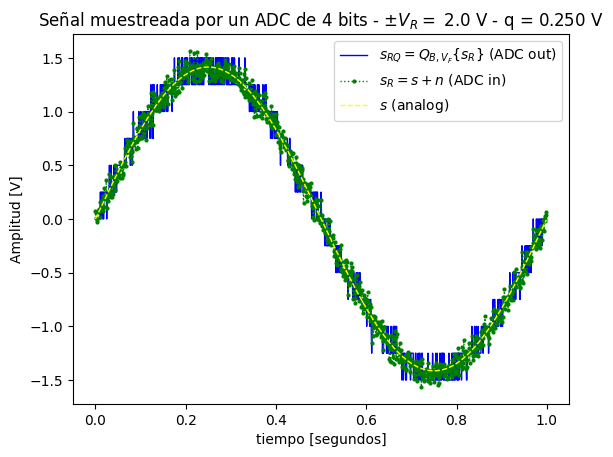

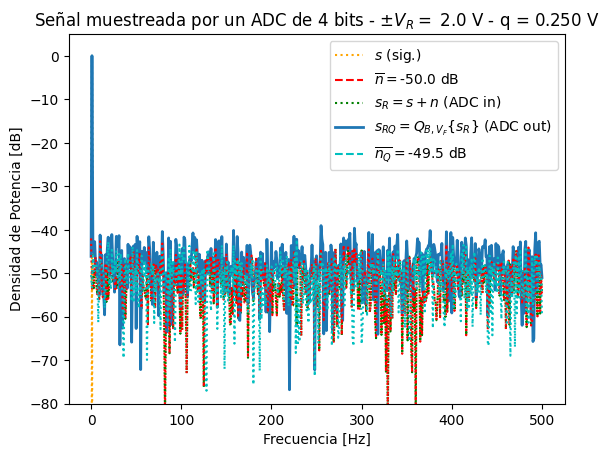

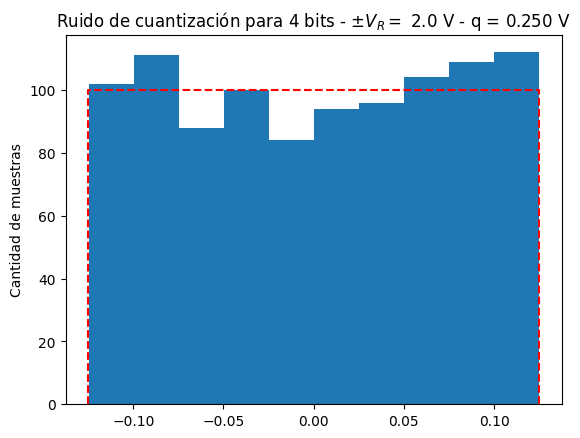

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# B = bits del ADC
# kn = escala para la potencia del ruido de cuantización
def cuantizacion_ADC (B,kn):
    
    def mi_funcion_sen (vmax, dc, f0, ph, N, fs):
        #fs frecuencia de muestreo (Hz)
        #N cantidad de muestras
        
        ts = 1/fs # tiempo de muestreo o periodo
        tt=np.linspace (0, (N-1)*ts, N) #vector de tiempo
        
        #generacion de la señal senoidal
        xx= dc + vmax*np.sin(2*np.pi*f0*tt + ph)
        #la señal debe generarse con la formula: x(t)=DC+Vmax*sen(2pift+fase)
        
        return tt, xx
    
    
    
    #%% Datos de la simulación
    
    fs =  1000 # frecuencia de muestreo (Hz)
    N = 1000 # cantidad de muestras
    # con 1000 para cada una normalizamos la resolucion espectral
    
    # Datos del ADC
    Vf = 2 # rango simétrico de +/- Vf Volts 
    q = 2*Vf/(2**B)# paso de cuantización de q Volts
    
    ##1 de ganancia, fijarte el ancho de banda, y la potencia del radio 50 al cuadrado
    # datos del ruido (potencia de la señal normalizada, es decir 1 W)
    pot_ruido_cuant = q**2/12 # Watts 
    pot_ruido_analog = pot_ruido_cuant * kn # 
    
    
    df = fs/N # resolución espectral
    f0 = df
    
    
    #%% Experimento: 
    """
       Se desea simular el efecto de la cuantización sobre una señal senoidal de 
       frecuencia 1 Hz. La señal "analógica" podría tener añadida una cantidad de 
       ruido gausiano e incorrelado.
       
       Se pide analizar el efecto del muestreo y cuantización sobre la señal 
       analógica. Para ello se proponen una serie de gráficas que tendrá que ayudar
       a construir para luego analizar los resultados.
       
    """
    # Genero señal senoidal
    tt, xx = mi_funcion_sen(1.4, 0,f0, 0, N, fs)
    # Potencia normalizada:
    xn=xx/np.std(xx)
    
    
    # np.random.normal
    # np.random.uniform
    
    
    # Señales
    
    analog_sig = xn # señal analógica sin ruido
    
    nn=np.random.normal(0,np.sqrt(pot_ruido_analog),N) # señal de ruido analogico
    
    sr = xn+nn # señal analógica de entrada al ADC (con ruido analógico)
    
    
    srq = np.round(sr/q)*q# señal cuantizada, (señal divida la cantidad total de bits)
    
    nq =  srq-sr# señal de ruido de cuantización
    
    
    
    
    #%% Visualización de resultados
    
    # cierro ventanas anteriores
    plt.close('all')
    
    ##################
    # Señal temporal
    ##################
    
    plt.figure(4)
    
    plt.plot(tt, srq, lw=1, linestyle='-', color='blue', markersize=5, markerfacecolor='blue', markeredgecolor='blue', fillstyle='none', label='$ s_{RQ} = Q_{B,V_F}\{s_R\}$ (ADC out)')
    plt.plot(tt, sr, lw=1, color='green', marker='o', markersize='2', ls='dotted', label='$ s_R = s + n $ (ADC in)')
    plt.plot(tt, analog_sig, lw=1, color='yellow', ls='--', label='$ s $ (analog)')
    
    plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
    plt.xlabel('tiempo [segundos]')
    plt.ylabel('Amplitud [V]')
    axes_hdl = plt.gca()
    axes_hdl.legend()
    plt.show()
    
    
    ###########
    # Espectro
    ###########
    
    plt.figure(5)
    ft_SR = 1/N*np.fft.fft( sr)
    ft_Srq = 1/N*np.fft.fft( srq)
    ft_As = 1/N*np.fft.fft( analog_sig)
    ft_Nq = 1/N*np.fft.fft( nq)
    ft_Nn = 1/N*np.fft.fft( nn)
    
    # grilla de sampleo frecuencial
    ff = np.linspace(0, (N-1)*df, N)
    
    bfrec = ff <= fs/2
    
    Nnq_mean = np.mean(np.abs(ft_Nq)**2)
    nNn_mean = np.mean(np.abs(ft_Nn)**2)
    
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As[bfrec])**2), color='orange', ls='dotted', label='$ s $ (sig.)' )
    plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB'.format(10* np.log10(2* nNn_mean)) )
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $ (ADC in)' )
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_{RQ} = Q_{B,V_F}\{s_R\}$ (ADC out)' )
    plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB'.format(10* np.log10(2* Nnq_mean)) )
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nn[bfrec])**2), ':r')
    plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
    
    plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
    plt.ylabel('Densidad de Potencia [dB]')
    plt.xlabel('Frecuencia [Hz]')
    plt.ylim(-80, 5)
    axes_hdl = plt.gca()
    axes_hdl.legend()
    
    #############
    # Histograma
    #############
    
    plt.figure(6)
    bins = 10
    plt.hist(nq.flatten(), bins=bins)
    plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
    plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))
    plt.ylabel('Cantidad de muestras')
    return

cuantizacion_ADC(B=4, kn=1)

Notese en este caso como los pisos de ruido tanto analógico como digital presentan valores próximos entre si (-50.2 dB y -4.96 dB respectivamente), siendo coherente con la relación entre la potencia de ambos ruidos, donde el factor de escala tiene valor de 1.

## Caso 2

$B = 4\,\, bits$ y $k_n = 10$

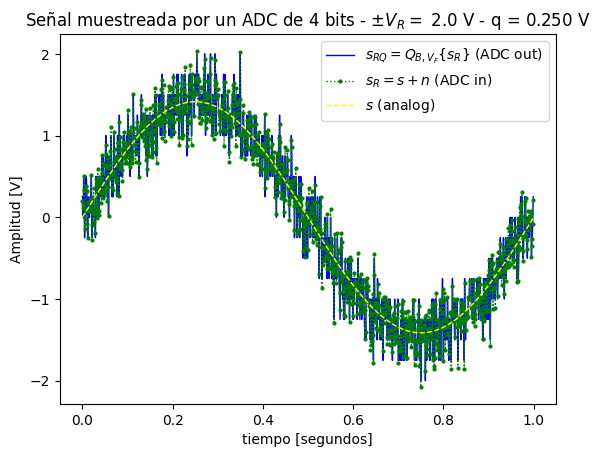

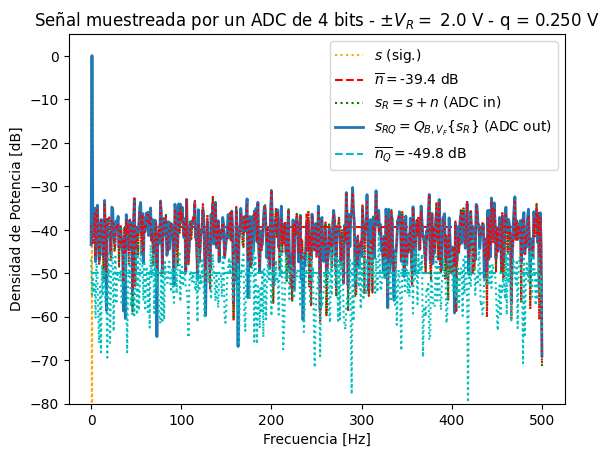

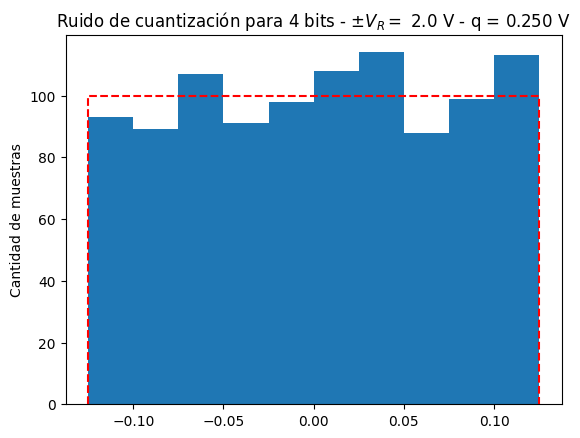

In [3]:
cuantizacion_ADC(B=4, kn= 10)

Se destaca en este ejemplo que la modificación del $k_n$ , aumentando su valor diez veces respecto del modelo tomado como base, conlleva a un aumento del piso de ruido analógico con respecto al digital de casi la misma magnitud (como se ve en el gráfico, dicha diferencia es de aprox. 10 dB). Nótese, a su vez, que la señal cuantizada saliente del ADC presenta como piso de ruido el establecido por el ruido analógico preexistente.

## Caso 3

$B = 8\,\, bits$ y $k_n = 1$

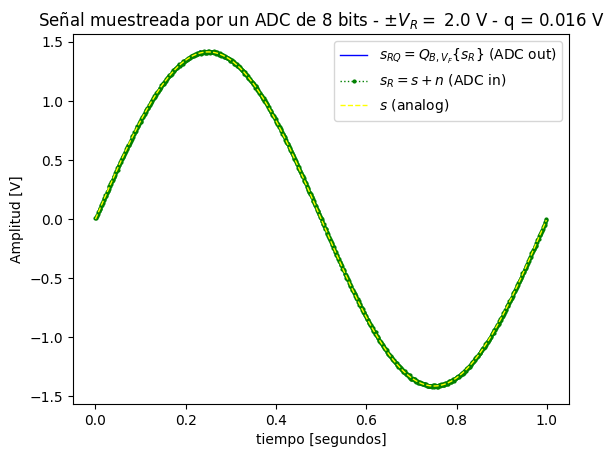

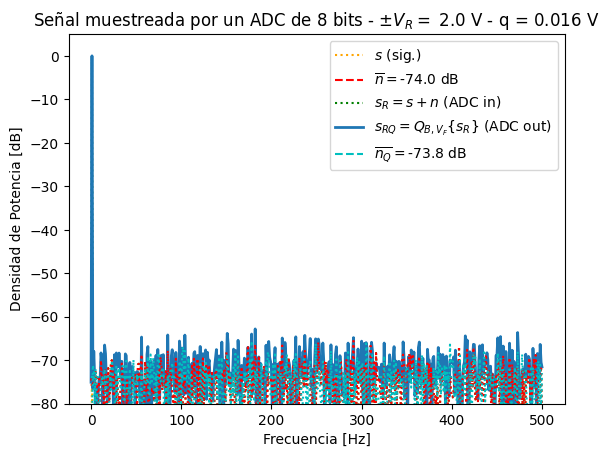

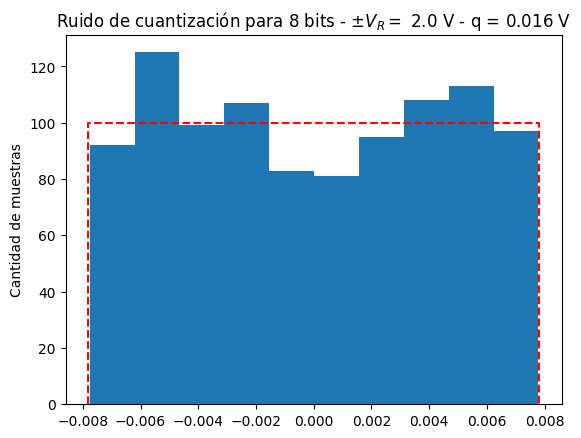

In [4]:
cuantizacion_ADC(B=8, kn= 1)

En este último caso, donde se duplico la cantidad de bits del dispositivo respecto del tomado como base, se redujeron notoriamente los pisos de ruido tanto analógico como digital (si bien la diferencia entre ambos pareció no ser alterada y mantenerse pequeña).

# Conclusiones

En base a los resultados obtenidos se pudo inferir que:

- La señal cuantizada, resultante del paso por el ADC, presentará un piso de ruido igual (o muy próximo) al del ruido dominante, entendiendose este por aquel (entre el analógico y el digital) que presente un mayor valor.
  
- La variación en el $k_n$ tiene implicada directamente la modificación de la diferencia entre los pisos de ruidos. Dado su implicancia como factor escalar en la relación entre potencias de ruido, su variación conlleva un cambio en el valor de la potencia analógica. Cuando el $k_n$ es mayor a 1, gráficamente el resultado será un piso de ruido analógico más elevado respecto del digital. En el caso que $k_n$ resulte menor a 1, la situación será la inversa: el piso analógico será menor.

  
- La modificación del número de bits en un ADC trae aparejada la modificación en el nivel de ruido de la señal de salida. Al aumentar la cantidad de bits, manteniendo fijo el reango de voltaje en el que tabaja el ADC, se reduce el tamaño de los pasos de cuantización ($q$), disminuyendo también la potencia del ruido de cuantización ($P_q = \frac {q^2}{12}$) y, de esta manera, la potencia del ruido analógico. Todo esto conlleva a que, bajo las condiciones de esta simulación (donde el ruido analógico y su potencia se definen de la manera descripta en el inicio), un aumento en el número de bits se traduzca en una señal de salida más "limpia" de ruido.